In [1]:
import scvelo as scv
import scanpy as sc
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [2]:
adata = scv.read('/home/chang2/gw19.h5ad')

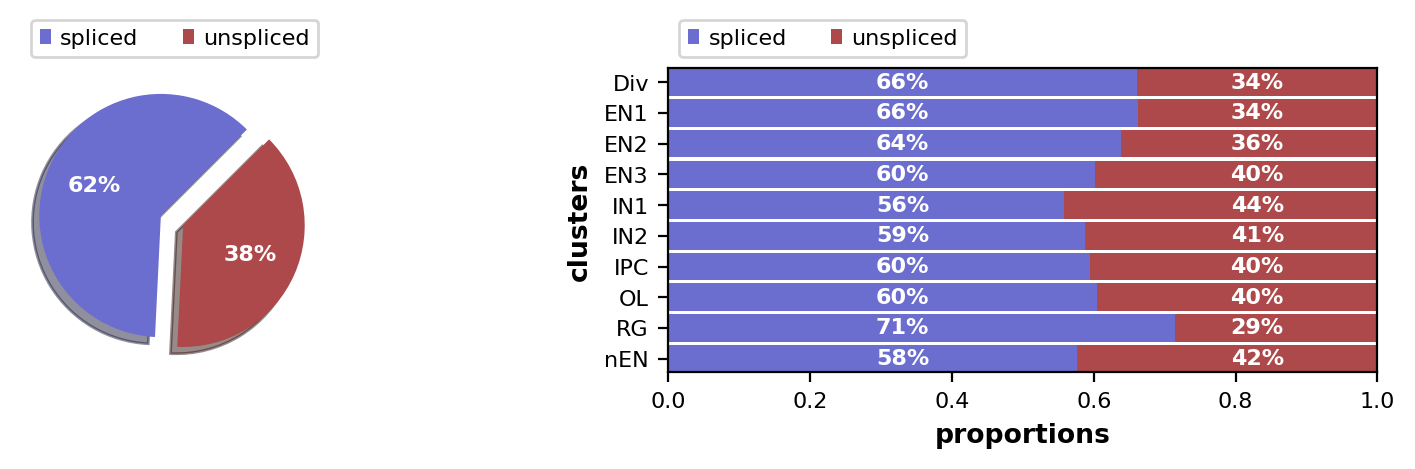

In [3]:
scv.pl.proportions(adata, groupby='clusters')

In [4]:
scv.pp.filter_genes(adata)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata)
scv.pp.log1p(adata)

Normalized count data: X, spliced, unspliced.
Extracted 2618 highly variable genes.


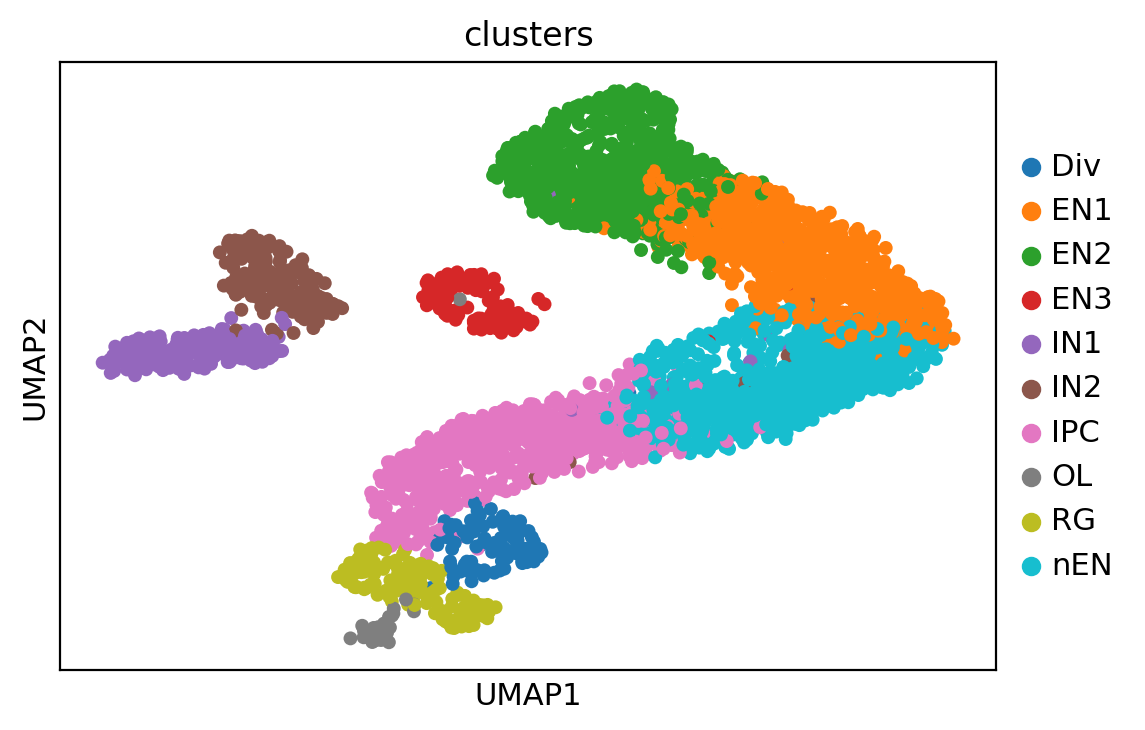

In [8]:
#scv.pp.moments(adata, n_pcs=30)
sc.tl.umap(adata, min_dist=1, spread = 1)
sc.pl.umap(adata, color=['clusters'], size=100)

In [6]:
scv.tl.recover_dynamics(adata, n_jobs=32)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

recovering dynamics (using 32/128 cores)


  0%|          | 0/1091 [00:00<?, ?gene/s]

    finished (0:00:28) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


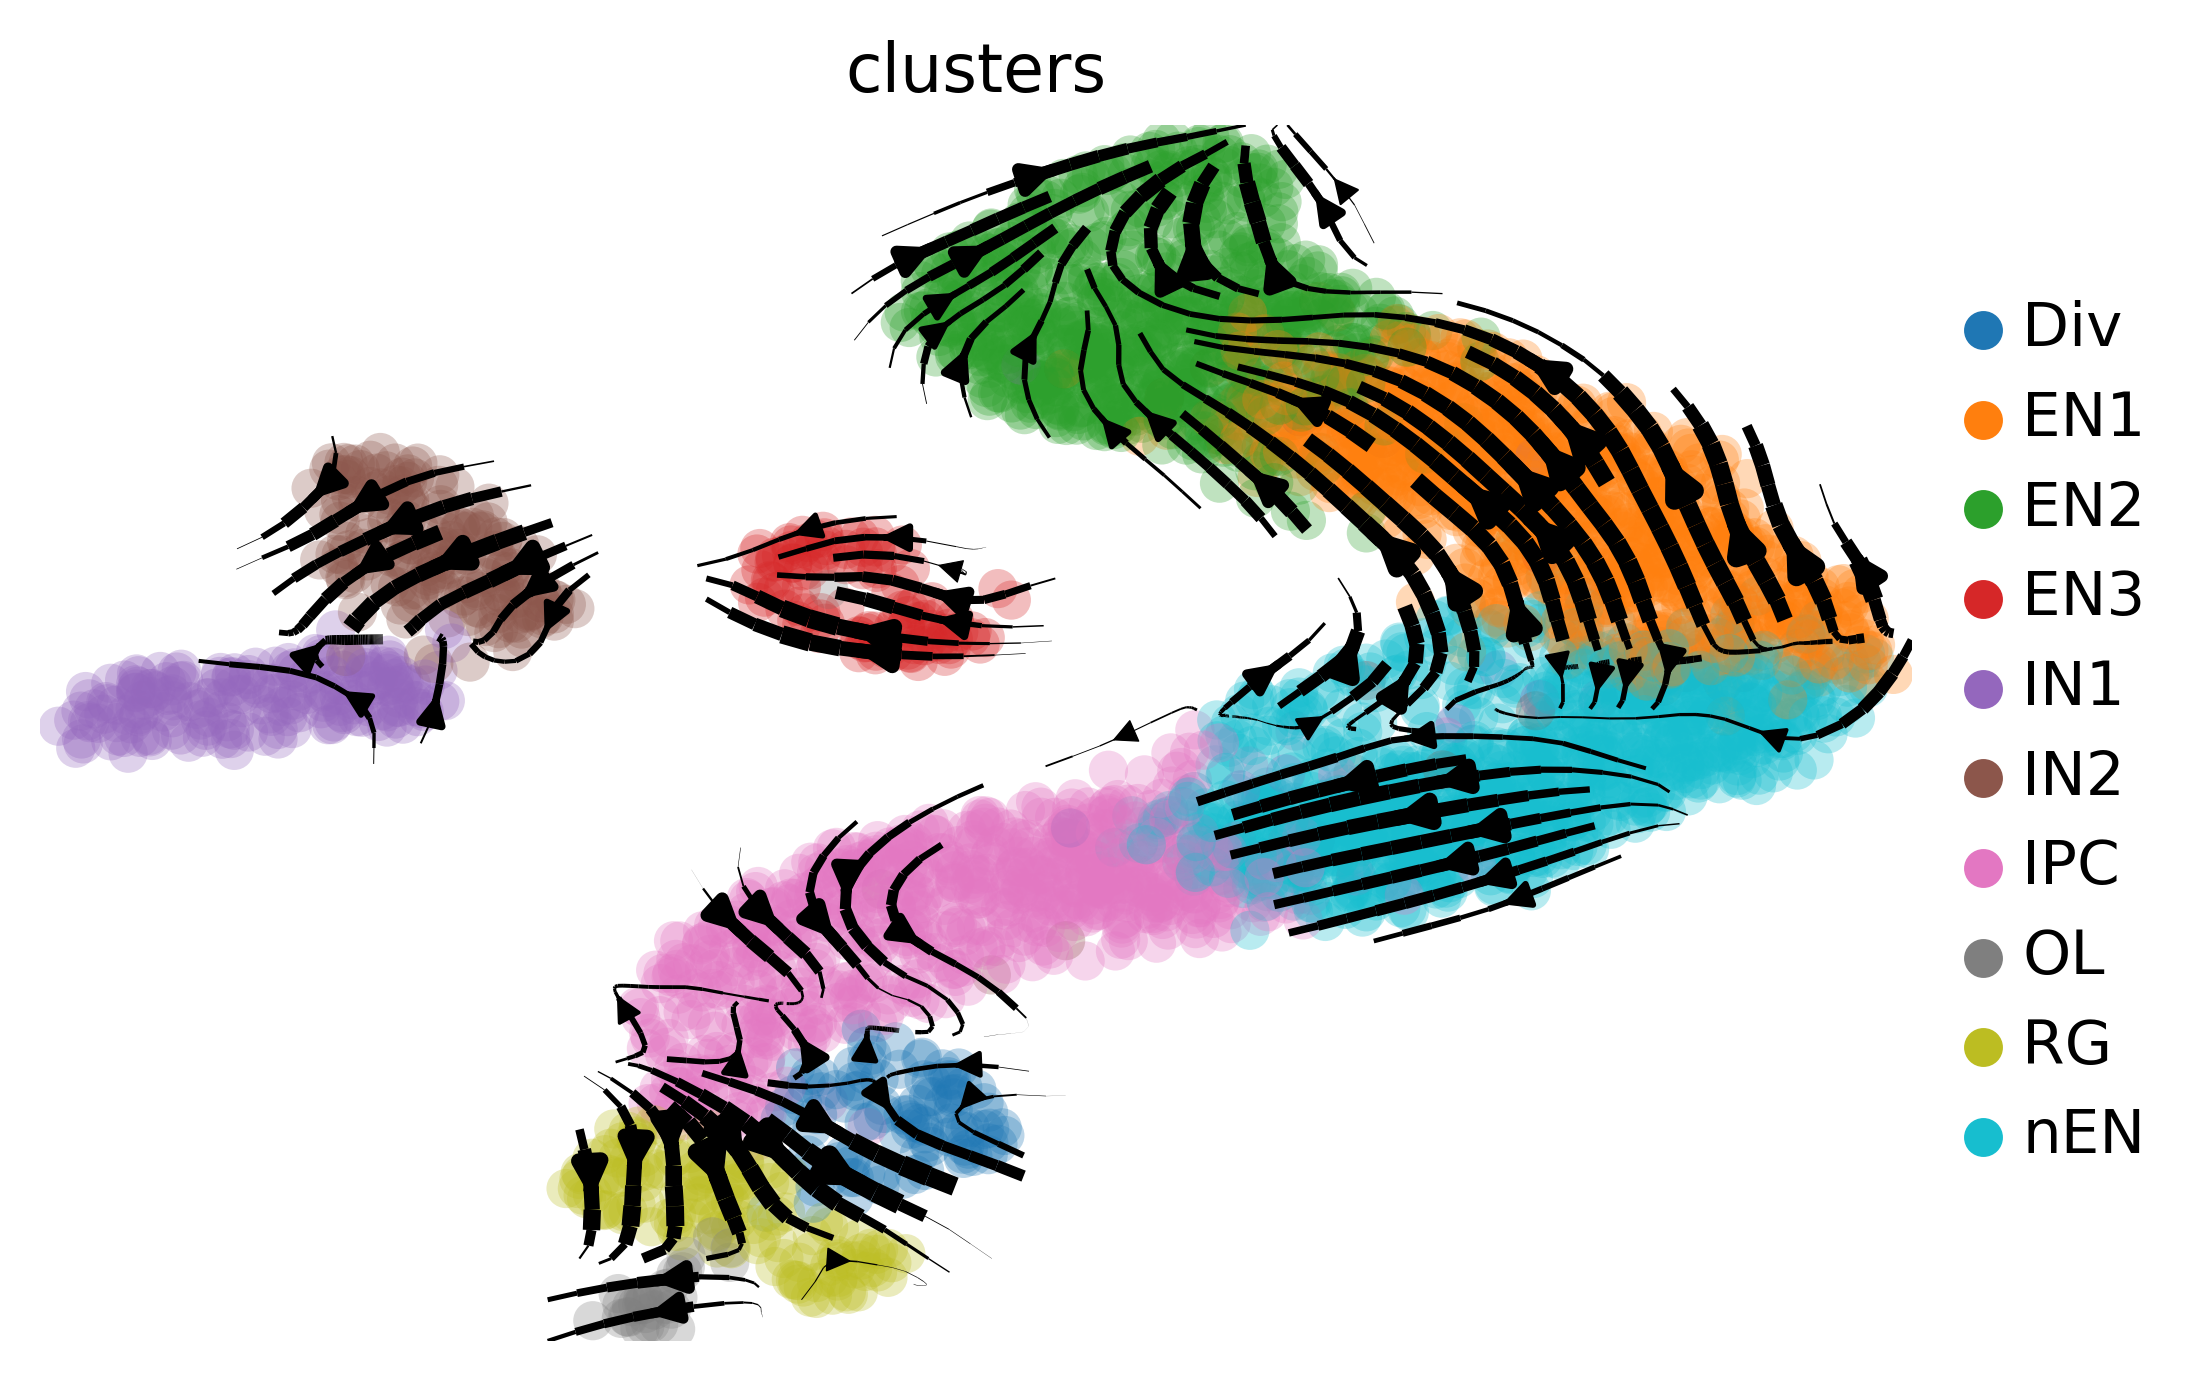

In [9]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_loc='right margin', dpi=200, linewidth=2, color='clusters')#, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

In [10]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:50]
scv.tl.differential_kinetic_test(adata, var_names=top_genes, groupby='clusters')

testing for differential kinetics
    finished (0:00:08) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pval_kinetics', p-values of differential kinetics (adata.var)


In [ ]:
scv.tl.velocity(adata, diff_kinetics=True)
scv.tl.velocity_graph(adata)

computing velocities
